<a href="https://colab.research.google.com/github/LANCARI/MOD-711-Machine-Learning/blob/main/Clustering_Optics_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MOD-711 MACHINE LEARNING  (Grupo A Clustering)
## Clustering - Optics Algorithm

#### Integrantes:
- Frida Aduviri
- Licett Ancari

## 1. Descripción

Clustering - Optics Algorithmalgoritmo es un algoritmo para encontrar datos basados en densidad.
clusters en datos espaciales. Fue presentado por Michael.
Ankerst, Markus M. Breunig, Hans-Peter Kriegel y Jörg
Lijadora. Su idea básica es similar a DBSCAN, pero
aborda una de las principales debilidades de DBSCAN: la
problema de detectar grupos significativos en datos de diferentes
densidad. Para ello, los puntos de la base de datos son
(linealmente) ordenados de manera que los puntos que están espacialmente
Los más cercanos se convierten en vecinos en el ordenamiento. Además, un
Se almacena una distancia especial para cada punto que representa la
densidad que debe aceptarse para que un cluster pueda
Haga que ambos puntos pertenezcan al mismo grupo.
Se requiere cortar la densidad de conglomerados que no es
ya no se considera interesante y acelerar el proceso
algoritmo de esta manera.
Estrictamente hablando, el parámetro no es necesario. Puede ser
establecido en un valor máximo. Cuando hay un índice espacial disponible,
Sin embargo, juega un papel práctico cuando se trata de
complejidad. A menudo se afirma que la ÓPTICA se abstrae de
DBSCAN al eliminar esto, a cada punto se le asigna un núcleo
distancia que básicamente describe la distancia a su
punto

## 2. Birtex y Referencias:

* @article{ankerst1999optics,
  title={OPTICS: Ordering points to identify the clustering structure},
  author={Ankerst, Mihael and Breunig, Markus M and Kriegel, Hans-Peter and Sander, J{\"o}rg},
  journal={ACM Sigmod record},
  volume={28},
  number={2},
  pages={49--60},
  year={1999},
  publisher={ACM New York, NY, USA}
}
* @article{verma2012comparative,
  title={A comparative study of various clustering algorithms in data mining},
  author={Verma, Manish and Srivastava, Mauly and Chack, Neha and Diswar, Atul Kumar and Gupta, Nidhi},
  journal={International Journal of Engineering Research and Applications (IJERA)},
  volume={2},
  number={3},
  pages={1379--1384},
  year={2012}
}
* https://www.geeksforgeeks.org/ml-optics-clustering-explanation/

## 3. Tipo de Modelo:

**Método de Aprendizaje:**No supervisado

**Por Parámetro:** Los algoritmos OPTICS esperan dos parámetros:

maxeps: una distancia que se utilizará para detectar grupos, el algoritmo verificará cada punto de datos maxeps-vecinos y, si hay suficientes puntos en esta vecindad, se formará un grupo.

minpts: el número de puntos que deberían estar en el vecindario maxeps, para considerar dichos puntos como un grupo.

**Datos de Aprendizaje:** Funciona en un enfoque "offline"

**Resultado del Entrenamiento:** No es un modelo


## 4. Algoritmos de Entrenamiento:

* Neighbourhood
* Core object
* Directly density-reachable
* Border object
* Density-connected
* Density-based cluster
* core-distance of an object p
* reachability-distance objectpi w.r.t. object o
* Spatial Radius ε1
* Non-Spatial Radius ε2



## 5. Supuestos y Restricciones:

* Supuestos:

1. Distribución de densidad variable: OPTICS está diseñado para detectar clústeres en conjuntos de datos con densidades variables. Esto significa que puede encontrar clústeres con diferentes densidades de puntos, lo que lo hace adecuado para datos donde los clústeres pueden tener tamaños y formas diversos.

2. No requiere especificar el número de clústeres: A diferencia de algunos algoritmos de clustering que requieren que el usuario especifique previamente el número de clústeres, OPTICS no tiene esta restricción. Puede descubrir automáticamente el número de clústeres en función de la densidad de los datos.

* Restricciones:

1. Sensibilidad al parámetro de distancia máxima (eps): OPTICS utiliza un parámetro de distancia máxima (ε) para determinar la vecindad de un punto. La elección de este parámetro puede afectar significativamente los resultados del clustering. Un valor demasiado pequeño puede resultar en una identificación de clústeres insatisfactoria, mientras que un valor demasiado grande puede agrupar puntos en un solo clúster.

2. Sensibilidad al parámetro de número mínimo de puntos (minPts): Además de
ε, OPTICS también requiere un parámetro mínimo de puntos (minPts) que define cuántos puntos deben estar dentro de la vecindad ε de un punto para considerarlo un núcleo. La elección de este valor también puede influir en los resultados de clustering.

3. Costo computacional: OPTICS puede ser computacionalmente costoso en conjuntos de datos grandes o con valores de minPts inapropiados, ya que implica cálculos de distancia y ordenamiento.

4. Sensibilidad a la escala de los datos: OPTICS puede ser sensible a la escala de los datos, por lo que es importante realizar un preprocesamiento adecuado, como la normalización, si los datos están en escalas muy diferentes.

5. Ordenamiento jerárquico: OPTICS produce un resultado en forma de representación jerárquica llamada "diagrama OPTICS" en lugar de una asignación de puntos a clústeres. Interpretar este diagrama puede requerir cierta experiencia y conocimiento del algoritmo.


**Data Set :**

Srata sobre agrupar a los clientes utilizando una técnica de aprendizaje no supervisada que es OPTICS (ordenación de puntos para identificar la estructura de agrupamiento), en otras palabras, detectamos grupos en función de la densidad, un grupo de puntos de datos que son demasiado densos con datos se consideran grupos. . En nuestro caso de aplicación, detectaremos clientes que sean lo suficientemente similares entre sí, estos segmentos de clientes deben ser lo suficientemente densos como para ser considerados como un solo clúster.

In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.metrics import silhouette_score
from sklearn.cluster import OPTICS
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

df = pd.read_csv("/content/Mall_Customers.csv")



In [ ]:
print(df.head(3))
print('----------')
print('Shape: ',df.shape)
print('----------')
print(df.dtypes)
print('---------- ')
print(df.isnull().sum())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
----------
Shape:  (200, 5)
----------
CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object
---------- 
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


We encode the "Gender" boolean variable using two digits ( 1 for "Male", 0 for "Female" ), and delete the first column since it doesn't help the clustering process.

In [ ]:
for k in range(0,200):
   if df["Gender"][k] == "Male":
       df["Gender"][k] = 1
   else :
       df["Gender"][k] = 0
df['Gender'] = df['Gender'].astype('int')
del df["CustomerID"]


<ipython-input-3-41ebe32a9daa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Gender"][k] = 1
<ipython-input-3-41ebe32a9daa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Gender"][k] = 0


There are very small signs of correlations.

In [ ]:
print(df.corr())

                          Gender       Age  Annual Income (k$)  \
Gender                  1.000000  0.060867            0.056410   
Age                     0.060867  1.000000           -0.012398   
Annual Income (k$)      0.056410 -0.012398            1.000000   
Spending Score (1-100) -0.058109 -0.327227            0.009903   

                        Spending Score (1-100)  
Gender                               -0.058109  
Age                                  -0.327227  
Annual Income (k$)                    0.009903  
Spending Score (1-100)                1.000000  


The Annual income values are dispersed within the range [20 k$,120 k$], 50% of the costumers have an annual income lower than 60 k.
25 % of the customer have an annual income greater than 80 k$

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual Income (k$), dtype: float64

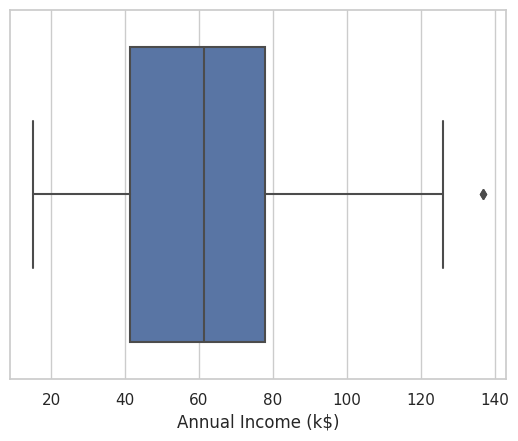

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["Annual Income (k$)"])
df["Annual Income (k$)"].describe()

The spending score values lie within the range [1,100]. It's some sort of metric that tells you how profitable a customer is. The higher it is, the lucrative the costumer is.

count    200.000000
mean      50.200000
std       25.823522
min        1.000000
25%       34.750000
50%       50.000000
75%       73.000000
max       99.000000
Name: Spending Score (1-100), dtype: float64


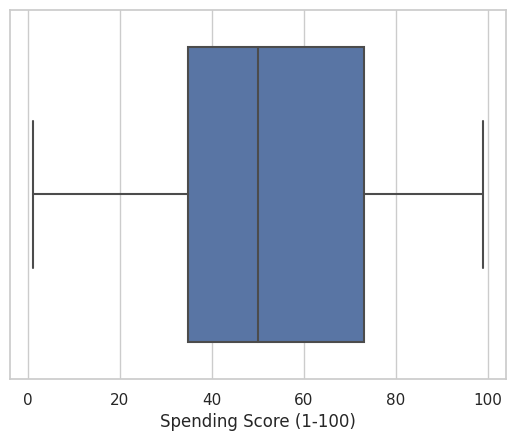

In [ ]:
zx = sns.boxplot(x=df["Spending Score (1-100)"])
print(df["Spending Score (1-100)"].describe())

50% of the costumers age are below 36 years, which insinuate that the younger generation are most likely to convert to clients. Therefore we will likely target this age range

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64


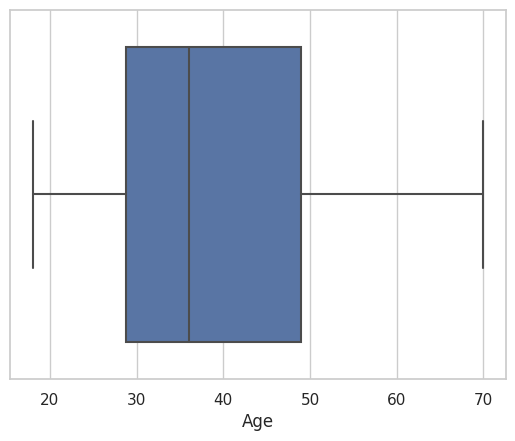

In [ ]:
zx = sns.boxplot(x=df["Age"])
print(df["Age"].describe())

The distribution of Male/Female among customers

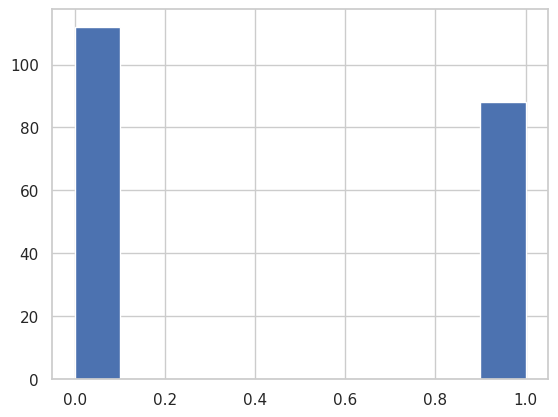

In [ ]:
import matplotlib.pyplot as plt
df["Gender"].hist()
plt.show()

Los algoritmos OPTICS esperan dos parámetros:

maxeps: una distancia que se utilizará para detectar grupos, el algoritmo verificará cada punto de datos maxeps-vecinos y, si hay suficientes puntos en esta vecindad, se formará un grupo
minpts: el número de puntos que deberían estar en el vecindario maxeps, para considerar dichos puntos como un grupo.

Después de múltiples pruebas, decidimos ejecutar el algoritmo OPTICS en un rango de valores minpts [10,50] y fijamos el parámetro maxeps.
Para cada configuración, calculamos el coeficiente de silueta. Obtendremos 40 resultados de agrupación diferentes porque probamos con diferentes valores de minpts. Primero aplicamos este enfoque a todas las funciones. Omitiremos algunos valores de minpts ya que devuelve solo un grupo, lo cual no es realmente útil.

La configuración que dio mayor coeficiente de silueta es la indexada con 18,
  mentas = 23
coeficiente de silueta = 0,21

In [ ]:
X = np.array(df[["Spending Score (1-100)","Annual Income (k$)","Gender","Age"]])

minpts = [i for i in range(10,51)]

maxeps = [300]*41

sil = [0]*41

for k in range(0,len(sil)):
    if k == 17 or k == 21 or k == 30 or k == 31 or k == 38 or k == 22:
        continue
    clustering = OPTICS(min_samples=minpts[k],max_eps=maxeps[k]).fit(X)
    print(clustering)
    sil[k] = silhouette_score(X,clustering.labels_)


maximum = max(sil)
index = sil.index(maximum)
print(index)
print("optimal minpts value :",minpts[index])
print("optimal silhouette coefficient value :",sil[index])


OPTICS(max_eps=300, min_samples=10)
OPTICS(max_eps=300, min_samples=11)
OPTICS(max_eps=300, min_samples=12)
OPTICS(max_eps=300, min_samples=13)
OPTICS(max_eps=300, min_samples=14)
OPTICS(max_eps=300, min_samples=15)
OPTICS(max_eps=300, min_samples=16)
OPTICS(max_eps=300, min_samples=17)
OPTICS(max_eps=300, min_samples=18)
OPTICS(max_eps=300, min_samples=19)
OPTICS(max_eps=300, min_samples=20)
OPTICS(max_eps=300, min_samples=21)
OPTICS(max_eps=300, min_samples=22)
OPTICS(max_eps=300, min_samples=23)
OPTICS(max_eps=300, min_samples=24)
OPTICS(max_eps=300, min_samples=25)
OPTICS(max_eps=300, min_samples=26)
OPTICS(max_eps=300, min_samples=28)
OPTICS(max_eps=300, min_samples=29)
OPTICS(max_eps=300, min_samples=30)
OPTICS(max_eps=300, min_samples=33)
OPTICS(max_eps=300, min_samples=34)
OPTICS(max_eps=300, min_samples=35)
OPTICS(max_eps=300, min_samples=36)
OPTICS(max_eps=300, min_samples=37)
OPTICS(max_eps=300, min_samples=38)
OPTICS(max_eps=300, min_samples=39)
OPTICS(max_eps=300, min_samp

Now we try the same using only : Spending score, Annual Income, Gender.
The configuration that gave the highest silhouette coefficient is the one indexed with 13,
mintpts = 23
silhoutte coefficient = 0.26365132840366795
The silhouette coefficient improved a little bit



In [ ]:
X = np.array(df[["Spending Score (1-100)","Annual Income (k$)","Gender"]])

for k in range(0,len(sil)):

    clustering = OPTICS(min_samples=minpts[k],max_eps=maxeps[k]).fit(X)
    print(clustering)
    sil[k] = silhouette_score(X,clustering.labels_)


maximum = max(sil)
index = sil.index(maximum)
print(index)
print("optimal minpts value :",minpts[index])
print("optimal silhouette coefficient value :",sil[index])


OPTICS(max_eps=300, min_samples=10)
OPTICS(max_eps=300, min_samples=11)
OPTICS(max_eps=300, min_samples=12)
OPTICS(max_eps=300, min_samples=13)
OPTICS(max_eps=300, min_samples=14)
OPTICS(max_eps=300, min_samples=15)
OPTICS(max_eps=300, min_samples=16)
OPTICS(max_eps=300, min_samples=17)
OPTICS(max_eps=300, min_samples=18)
OPTICS(max_eps=300, min_samples=19)
OPTICS(max_eps=300, min_samples=20)
OPTICS(max_eps=300, min_samples=21)
OPTICS(max_eps=300, min_samples=22)
OPTICS(max_eps=300, min_samples=23)
OPTICS(max_eps=300, min_samples=24)
OPTICS(max_eps=300, min_samples=25)
OPTICS(max_eps=300, min_samples=26)
OPTICS(max_eps=300, min_samples=27)
OPTICS(max_eps=300, min_samples=28)
OPTICS(max_eps=300, min_samples=29)
OPTICS(max_eps=300, min_samples=30)
OPTICS(max_eps=300, min_samples=31)
OPTICS(max_eps=300, min_samples=32)
OPTICS(max_eps=300, min_samples=33)
OPTICS(max_eps=300, min_samples=34)
OPTICS(max_eps=300, min_samples=35)
OPTICS(max_eps=300, min_samples=36)
OPTICS(max_eps=300, min_samp

We tried again with : spending score, annual income, age. This one hasn't shown any improvement.

In [ ]:
X = np.array(df[["Spending Score (1-100)","Annual Income (k$)","Age"]])
for k in range(0,len(sil)):
    if k == 17 or k == 21 or k == 30 or k == 31 or k == 38:
        continue
    clustering = OPTICS(min_samples=minpts[k],max_eps=maxeps[k]).fit(X)
    print(clustering)
    sil[k] = silhouette_score(X,clustering.labels_)


maximum = max(sil)
index = sil.index(maximum)
print(index)
print("optimal minpts value :",minpts[index])
print("optimal silhouette coefficient value",sil[index])

OPTICS(max_eps=300, min_samples=10)
OPTICS(max_eps=300, min_samples=11)
OPTICS(max_eps=300, min_samples=12)
OPTICS(max_eps=300, min_samples=13)
OPTICS(max_eps=300, min_samples=14)
OPTICS(max_eps=300, min_samples=15)
OPTICS(max_eps=300, min_samples=16)
OPTICS(max_eps=300, min_samples=17)
OPTICS(max_eps=300, min_samples=18)
OPTICS(max_eps=300, min_samples=19)
OPTICS(max_eps=300, min_samples=20)
OPTICS(max_eps=300, min_samples=21)
OPTICS(max_eps=300, min_samples=22)
OPTICS(max_eps=300, min_samples=23)
OPTICS(max_eps=300, min_samples=24)
OPTICS(max_eps=300, min_samples=25)
OPTICS(max_eps=300, min_samples=26)
OPTICS(max_eps=300, min_samples=28)
OPTICS(max_eps=300, min_samples=29)
OPTICS(max_eps=300, min_samples=30)
OPTICS(max_eps=300, min_samples=32)
OPTICS(max_eps=300, min_samples=33)
OPTICS(max_eps=300, min_samples=34)
OPTICS(max_eps=300, min_samples=35)
OPTICS(max_eps=300, min_samples=36)
OPTICS(max_eps=300, min_samples=37)
OPTICS(max_eps=300, min_samples=38)
OPTICS(max_eps=300, min_samp

Next we move forward with the feature that gave the highest silhouette coefficient

In [ ]:
X = np.array(df[["Spending Score (1-100)","Annual Income (k$)","Gender"]])
clustering = OPTICS(min_samples=minpts[13],max_eps=maxeps[31]).fit(X)
cluster = list(clustering.labels_)
print(cluster)

values, counts = np.unique(cluster, return_counts=True)
print("cluster number",len(values))

for x in range(0,len(values)):
    if values[x] == -1:
        print("outliers :",counts[x])
    else :
        print("cluster",values[x]," : ",counts[x])
df['class'] = cluster


[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, -1, 0, 1, -1, -1, -1, -1, 0, 0, -1, 1, -1, -1, -1, -1, -1, 1, 0, 1, -1, 1, 0, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, 0, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, 1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1]
cluster number 3
outliers : 83
cluster 0  :  87
cluster 1  :  30


We notice that we got 2 clusters green and blue colors while the red points are considered noise by the algorithm. They are not surrounded by enough point in their neighborhood to be considered clusters. They don’t belong either to any border of any core point.
It would be interesting to focus on the clients that have an annual income between 40 and 80 ( green cluster ). This cluster is very dense, therefore it would would be good to focus on
retaining those clients. They also have an interesting spending score
between 40 and 60.


Text(0, 0.5, 'Spending Score')

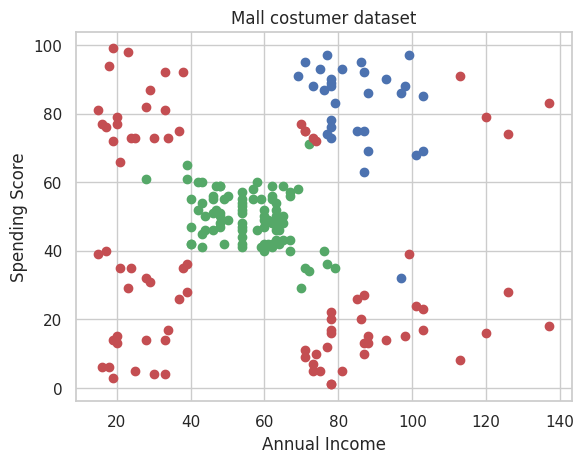

In [ ]:
colors = {-1:'r', 0:'g',1:'b',2:'#1f77b4',3:'#1f90b1',4:'#1f50b1',5:'#1f60b1'}
# create a figure and axis
fig, ax = plt.subplots()
# plot each data-point
for i in range(len(df['class'])):

  ax.scatter(df['Annual Income (k$)'][i],df['Spending Score (1-100)'][i],color=colors[df["class"][i]])
# if minmax_df['class'][i] == -1:
 #    class1 = class1 + 1
# else:
 #    class0 = class0 + 1
# set a title and labels
ax.set_title('Mall costumer dataset')
ax.set_xlabel('Annual Income')
ax.set_ylabel('Spending Score')
#print("class 1 : ",class1,"\n")
#print("class 0 : ",class0,"\n")


Next, we try out with other combinations of features

In [ ]:
X = np.array(df[["Annual Income (k$)","Gender"]])

for k in range(0,len(sil)):

    clustering = OPTICS(min_samples=minpts[k],max_eps=maxeps[k]).fit(X)
    cluster = list(clustering.labels_)
    if len(np.unique(cluster)) == 1:

            continue

    sil[k] = silhouette_score(X,clustering.labels_)



maximum = max(sil)
index = sil.index(maximum)
print(index)
print("optimal minpts value :",minpts[index])
print("optimal silhouette coefficient value :",sil[index])


27
optimal minpts value : 37
optimal silhouette coefficient value : 0.42107046296313655


In [ ]:
clustering = OPTICS(min_samples=minpts[13],max_eps=maxeps[31]).fit(X)
cluster = list(clustering.labels_)
print(cluster)

values, counts = np.unique(cluster, return_counts=True)
print("cluster number",len(values))

for x in range(0,len(values)):
    if values[x] == -1:
        print("outliers :",counts[x])
    else :
        print("cluster",values[x]," : ",counts[x])

df['class'] = cluster

[-1, -1, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
cluster number 5
outliers : 61
cluster 0  :  28
cluster 1  :  50
cluster 2  :  36
cluster 3  :  25


This version gives us a couple clusters by ranges of Annual Income (the green cluster whose customers Spending Score is approximately equally distributed from 1 - 100) the two other clusters has their Spending score centered around 50)

Text(0, 0.5, 'Spending Score (1-100)')

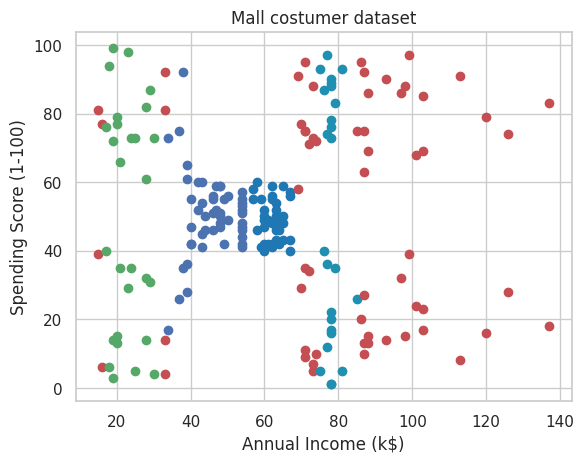

In [ ]:
fig,bx = plt.subplots()

for i in range(len(df['class'])):
 bx.scatter(df['Annual Income (k$)'][i], df['Spending Score (1-100)'][i],color=colors[df['class'][i]])


bx.set_title('Mall costumer dataset')
bx.set_xlabel('Annual Income (k$)')
bx.set_ylabel('Spending Score (1-100)')

Next, we try running the algorithm using the two feature Spending Score and age.

In [ ]:
X = np.array(df[["Spending Score (1-100)","Age"]])

for k in range(0,len(sil)):

    clustering = OPTICS(min_samples=minpts[k],max_eps=maxeps[k]).fit(X)
    cluster = list(clustering.labels_)
    if len(np.unique(cluster)) == 1:

        continue

    sil[k] = silhouette_score(X,clustering.labels_)

maximum = max(sil)
index = sil.index(maximum)
print(index)
print("optimal minpts value :",minpts[index])
print("optimal silhouette coefficient :",sil[index])

17
optimal minpts value : 27
optimal silhouette coefficient : 0.46288486847296384


In [ ]:
clustering = OPTICS(min_samples=minpts[17],max_eps=maxeps[17]).fit(X)
cluster = list(clustering.labels_)
print(cluster)

values, counts = np.unique(cluster, return_counts=True)
print("cluster number",len(values))

for x in range(0,len(values)):
    if values[x] == -1:
        print("outliers :",counts[x])
    else :
        print("cluster",values[x]," : ",counts[x])

df['class'] = cluster

[-1, 0, -1, 0, -1, 0, -1, 0, -1, 0, -1, 0, -1, 0, -1, 0, -1, 0, -1, 0, -1, 0, -1, 0, -1, 0, -1, -1, -1, 0, -1, 0, -1, 0, -1, 0, -1, 0, -1, 0, -1, 0, -1, -1, -1, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, -1, 0, -1, 0, -1, 0, -1, 0, -1, 0, -1, 0, -1, 0, -1, 0, -1, 0, -1, 0, -1, 0, -1, 0, -1, 0, -1, 0, -1, 0, -1, 0, -1, 0, -1, 0, -1, 0, -1, 0, -1, 0, -1, 0, -1, 0, -1, 0, -1, 0, -1, 0, -1, 0, -1, 0, -1, 0, -1, 0, -1, 0, -1, 0, -1, 0, -1, 0, -1, 0, -1, 0, -1, 0, -1, 0]
cluster number 2
outliers : 139
cluster 0  :  61


The cluster 0 is green colored while the red colored points are considered
noise by the algorithm. This clustering recommands to focus on the green cluster. the
annual income of that green population lies within the interval [42,102] which seems to   rather interesting interval. This cluster of individuals contains clients whose spending score    variance is very high as you see the large spread of spending score values of the green cluster. Let’s apply again this procedure to the feature “Age” and “Spending Score”
The silhouette coefficient for this configuration is 0.46. This means that the green cluster   is the most import segment to focus on because it’s dense with young clients with very high Spending Score. The marketing team should prioritize the conservation of this segment (people whose age lies from 20 to 42)


Text(0, 0.5, 'Spending score')

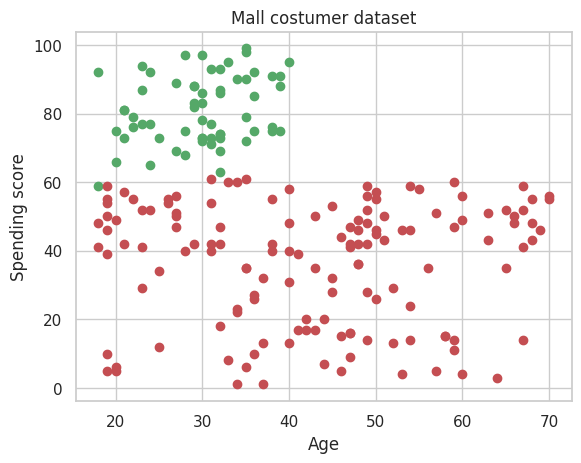

In [ ]:
fig,px = plt.subplots()

for i in range(len(df['class'])):
 px.scatter(df['Age'][i], df['Spending Score (1-100)'][i],color=colors[df['class'][i]])


px.set_title('Mall costumer dataset')
px.set_xlabel('Age')
px.set_ylabel('Spending score')